In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive 

In order to run this, you need first to create a shortcut of CMG_project directory into your personal Drive folder

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Creating the specific path for data

In [3]:
PATH = "/content/gdrive/MyDrive/CMG_project/data/files"

initializing empty dictionaries
For each dictionary we will get as key the MAG sample name. As vaue we get the total number of times that we found a hypotehtical protein (`hypothetical_dict`) and the number of times we found a CDS protein (`CSD_dict`).

In [4]:
hypothetical_dict = {}
CDS_dict = {}
hp_CDS_dict = {}

### Read outputs
For each sample, we read the `.tsv` file as a pandas dataframe. In column `ftype` we can may find CDS values. In column `product` we could find hypotehtical protein annotations.
This code counts how many occurrences of these to labels it finds in each file and stores the result in the proper dictionary.

In [5]:
for file in os.listdir(PATH):
    MAG_dir_path = os.path.join(PATH, file)
    short_path = file

    # checking if it is a dir
    if os.path.isdir(MAG_dir_path):

        for file in os.listdir(MAG_dir_path):
            tsv_file = os.path.join(MAG_dir_path, file) 

            # find all TSV files
            if tsv_file.endswith(".tsv"):
                tsv_file = pd.read_table(tsv_file, index_col=0)
                CDS_dict[short_path] = tsv_file.ftype.value_counts().CDS
                temp_dict = dict(tsv_file["product"].value_counts())
                hypothetical_dict[short_path] = temp_dict["hypothetical protein"]

                counter = 0
                for index, row in tsv_file.iterrows():
                  if row["product"] != "hypothetical protein" and row["ftype"] == "CDS":
                    counter += 1
                hp_CDS_dict[short_path] = counter

Compute the total of values stored in the dictionaries. This will be useful for average computation

In [6]:
sum_CDS = 0
for key in CDS_dict:
    sum_CDS += CDS_dict[key]

sum_hp = 0
for key in hypothetical_dict:
    sum_hp += hypothetical_dict[key]

sum_hp_CDS = 0
for key in hp_CDS_dict:
    sum_hp_CDS += hp_CDS_dict[key]

In [8]:
CDS_dict

{'FengQ_2015__SID31537__bin.6': 2034,
 'ChengpingW_2017__AS132raw__bin.49': 1639,
 'LeChatelierE_2013__MH0193__bin.74': 2032,
 'KarlssonFH_2013__S421__bin.34': 2100,
 'FengQ_2015__SID530323__bin.29': 2074,
 'FengQ_2015__SID31455__bin.19': 2103,
 'KarlssonFH_2013__S456__bin.26': 1970,
 'LeChatelierE_2013__MH0195__bin.45': 2277,
 'LeChatelierE_2013__MH0448__bin.89': 2206,
 'LiJ_2014__MH0362__bin.41': 1699,
 'LiJ_2014__O2.UC28-0__bin.29': 1813,
 'LiJ_2014__MH0385__bin.33': 2238,
 'LiuW_2016__SRR3993017__bin.10': 2232,
 'LeChatelierE_2013__MH0416__bin.44': 2096,
 'LeChatelierE_2013__MH0442__bin.94': 1984,
 'MehtaRS_2018__SID50694555_SF07__bin.24': 2277,
 'ViscontiA_2019__SID176192__bin.24': 1822,
 'XieH_2016__YSZC12003_35733__bin.35': 1978,
 'ViscontiA_2019__SID472259__bin.25': 2402,
 'ViscontiA_2019__SID931679__bin.29': 1981,
 'XieH_2016__YSZC12003_36000__bin.103': 1849,
 'XieH_2016__YSZC12003_36052__bin.36': 2081,
 'XieH_2016__YSZC12003_36012__bin.54': 1930,
 'XieH_2016__YSZC12003_35549_

plot values of the two dictionaries along with the mean of the two dictionaries

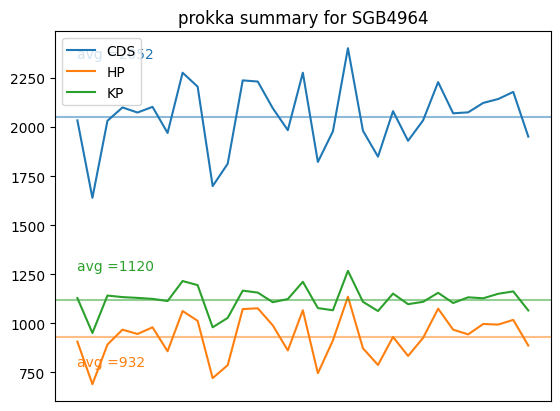

In [9]:
plt.plot(list(CDS_dict.keys()), list(CDS_dict.values()), "-", 
         list(CDS_dict.keys()), list(hypothetical_dict.values()), "-",
         list(CDS_dict.keys()), list(hp_CDS_dict.values()), "-")
plt.xticks([])
plt.gca().legend(('CDS','HP', 'KP'))
plt.title("prokka summary for SGB4964")
plt.axhline(y=sum_CDS/len(CDS_dict), color='tab:blue', alpha=0.5)
plt.axhline(y=sum_hp/len(hypothetical_dict), color='tab:orange', alpha=0.5)
plt.axhline(y=sum_hp_CDS/len(hp_CDS_dict), color='tab:green', alpha=0.5)
plt.text(0, sum_CDS/len(CDS_dict) + 300,'avg =' + str(round(sum_CDS/len(CDS_dict))), color='tab:blue')
plt.text(0, sum_hp/len(hypothetical_dict) - 150,'avg =' + str(round(sum_hp/len(hypothetical_dict))), color='tab:orange')
plt.text(0, sum_hp_CDS/len(hp_CDS_dict) + 150,'avg =' + str(round(sum_hp_CDS/len(hp_CDS_dict))), color='tab:green')
plt.show()